<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/mock_belt_exam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mock Belt Exam 3

## Checklist

- [x] Clustering data file is correctly loaded
- [x] Data is properly cleaned

Clustering

- [x] Data is properly prepared for clustering
- [x] KMeans model is fit on data
- [x] Compare inertia over 2-10 clusters
- [x] Compare silhouette score over 2-10 clusters
- [x] Explain choice of number of clusters based on silhouette score or inertia
- [x] 1st explanatory visualization shows a difference between clusters
- [x] Interprets 1st visualization to describe a trend in clusters
- [x] 2nd explanatory visualization shows a difference between clusters
- [x] Interprets 2nd visualization to describe a trend in clusters

Modeling

- [x] Modeling data file is correctly loaded
- [x] Train/test split is performed
- [x] Data is prepared for PCA without data leakage
- [x] PCA is performed without data leakage
- [x] Sequential deep learning model 1 is created and fit on data
- [x] Reasons for changes between models 1 and 2 are explained in text
- [x] Sequential deep learning model 2 is created and fit on data
- [x] Reasons for changes between models 2 and 3 are explained in text
- [x] Sequential deep learning model 3 is created and fit on data
- [x] Regularization is used with at least 1 model.
- [x] Each model's final layer is appropriate to the prediction type
- [x] Model loss function is appropriate to prediction type
- [x] Final model is chosen
- [x] Final model choice is justified in text.
- [x] Evaluates final model with multiple appropriate metrics
- [x] Summary relates final model performance to business problem

Other

- [x] File Reqts: Python code for part 1
- [x] File Reqts: Python code for part 2
- [x] Code: Organization, structure, indentation, comments
- [x] Code: Unnecessary code or errors in code
- [x] Code: Unnecessary imports
- [x] Code: Unnecessary files

In [273]:
# Helper function from the Coding Dojo learning platform to help visualize the 
# metrics of our models

# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

## Imports

In [326]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sci-kit learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

## Load the data

In [275]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQUNT3U_YhCjTxSCr9HoAS9TWPWOvs2qxlAN9NOktCv1S8sjzj2rJ81jBX6mLr_8TFwer-Ya2M1fPx8/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


## Data cleaning

In [276]:
# Check for duplicates and missing values
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 0


> We see there are no missing values nor duplicates

In [277]:
# Use the info method on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

> This data is from a satisfaction survey. We see the data is reported as integers. 

In [278]:
# Get the descriptive statistics of the data
df.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


> There do not appear to be any outliers in the data columns that were shown.

In [279]:
# Get the descriptive statistics on the data columns we could not see
df[['Inflight entertainment', 
    'On-board service', 
    'Leg room service']].describe()

,Inflight entertainment,On-board service,Leg room service
count,20000.000000,20000.000000,20000.000000
mean,3.349100,3.385350,3.350850
std,1.333348,1.278451,1.316602
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


> Nothing seems amiss with these values. When constructing visulizations we will keep in mind that 1 is for male and 0 is for female in the gender_male column.

In [280]:
# Make a copy of the data frame for modeling
ml_df = df.copy()

In [281]:
# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

> Data has been cleaned and scaled. We are ready for k-means analysis.

## KMeans

In [282]:
# Get the inertias and silhouette scores
inertias = []
sils = []
ks = range(2, 11)

for k in ks:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)
  sils.append(silhouette_score(scaled_df, kmeans.labels_))

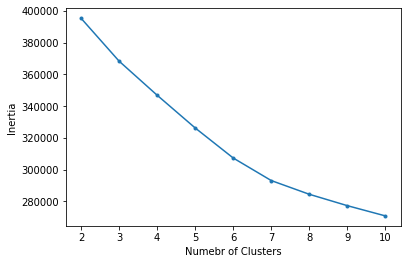

Text(0, 0.5, 'Silhouette Score')

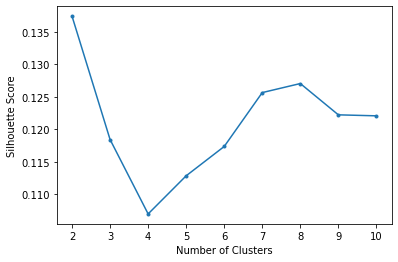

In [283]:
# Plot the inertias and silhouette scores
plt.plot(ks, inertias, marker = '.');
plt.xlabel('Numebr of Clusters');
plt.ylabel('Inertia');
print()
plt.show();
plt.plot(ks, sils, marker = '.');
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

> We will use 7 clusters. We feel 8 clusters gives the best elbow on the inertia plot and has a reasonably high silhouette score.

### Visualizations

In [284]:
# Build a model with seven clusters
kmeans = KMeans(n_clusters = 8, random_state = 42)
kmeans.fit(scaled_df)

KMeans(random_state=42)

In [285]:
# Add the cluster labels to the original data frame
df['clusters'] = kmeans.labels_

In [286]:
# Group the clusters by mean
clusters_by_mean = df.groupby('clusters', as_index = False).mean()
# Get the dimensions to determine how many subplots we need
clusters_by_mean.shape

(8, 24)

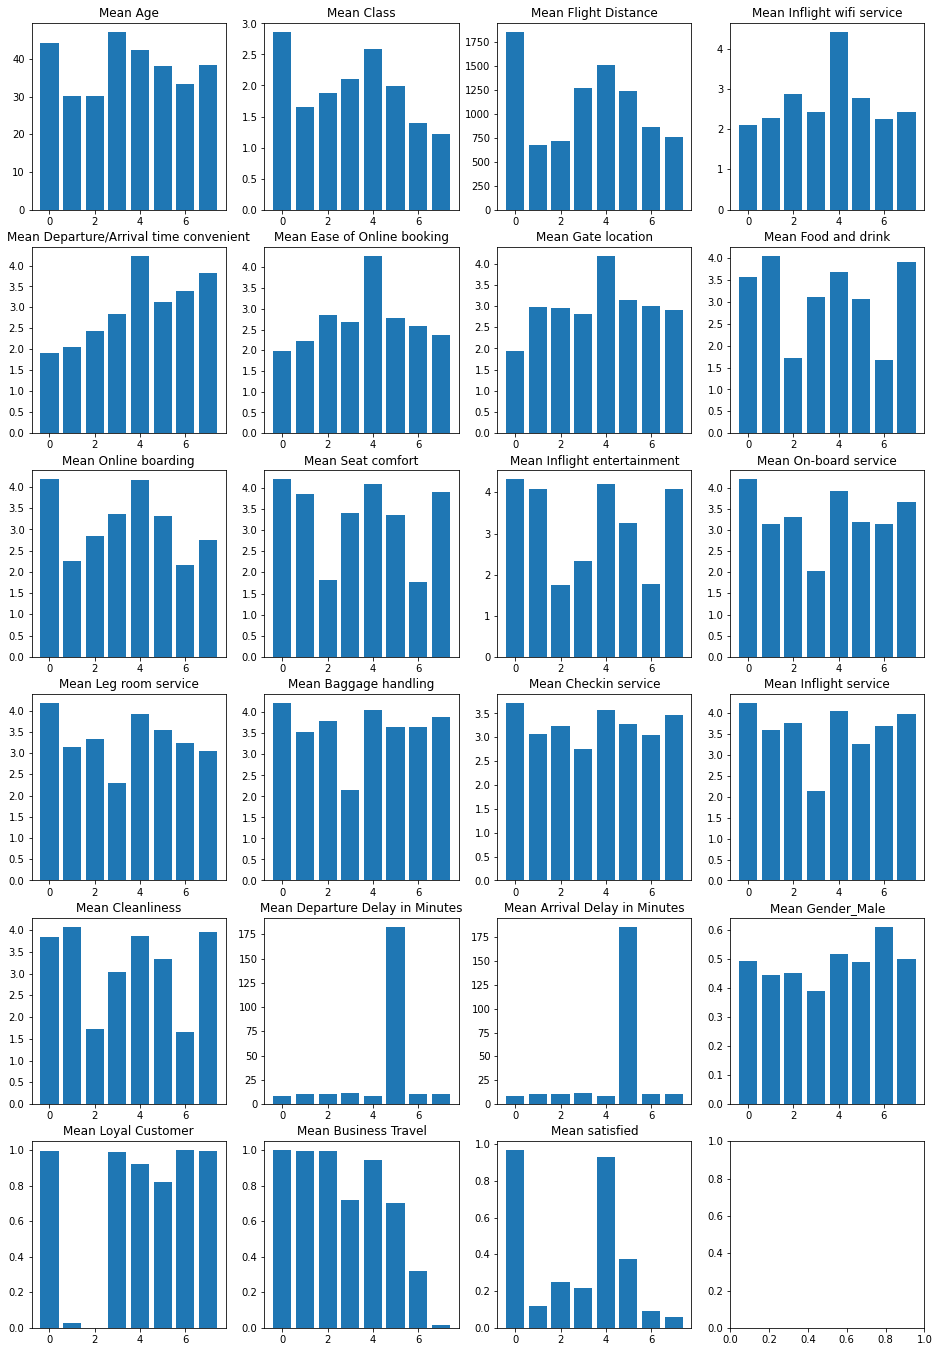

In [287]:
# Plot the mean values by cluster
fig, axes = plt.subplots(6, 4, figsize = (16, 24));
axes = axes.ravel()
for i, col in enumerate(clusters_by_mean.columns[1:]):
  axes[i].bar(clusters_by_mean['clusters'], clusters_by_mean[col]);
  axes[i].set_title(f'Mean {col}')

In [288]:
clusters_by_mean

,clusters,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,44.261719,2.861886,1857.098772,2.109654,1.903739,1.980748,1.946429,3.581194,4.181362,...,4.224888,3.720145,4.244141,3.852400,8.716797,8.903181,0.493304,0.998047,0.998884,0.967913
1,1,30.050289,1.648555,676.851445,2.278035,2.046243,2.223699,2.987283,4.060694,2.267052,...,3.545087,3.072254,3.589595,4.080925,10.415029,10.669364,0.445087,0.026012,0.994798,0.119653
2,2,30.078520,1.872161,721.100584,2.879948,2.443219,2.861129,2.949384,1.731343,2.856587,...,3.792343,3.234263,3.776768,1.728099,10.128488,10.621025,0.452304,0.000649,0.994809,0.250487
3,3,47.117117,2.105002,1276.230817,2.440199,2.849332,2.672880,2.805219,3.112147,3.362224,...,2.144144,2.750854,2.132961,3.031376,11.237030,11.935073,0.389873,0.990370,0.719167,0.219633
4,4,42.351012,2.590248,1517.252638,4.418591,4.234674,4.282578,4.191617,3.692900,4.166809,...,4.064728,3.582264,4.048760,3.876818,8.808383,8.725691,0.518392,0.920730,0.944682,0.929855
5,5,38.198444,1.996109,1238.665370,2.776265,3.138132,2.776265,3.147860,3.060311,3.317121,...,3.657588,3.270428,3.262646,3.330739,182.916342,185.984436,0.490272,0.819066,0.702335,0.377432
6,6,33.196057,1.399781,861.191676,2.243885,3.391384,2.587806,2.998540,1.670318,2.161738,...,3.643666,3.041621,3.693684,1.655714,10.387003,10.922965,0.611172,0.999635,0.322380,0.092004
7,7,38.477574,1.213519,760.669299,2.430512,3.812066,2.378080,2.898610,3.915666,2.758686,...,3.896715,3.472836,3.983260,3.955148,10.097284,10.327543,0.498737,0.997473,0.016425,0.058433


Cluster descriptions

- Cluster 0: Cluster 0 has an average age of about 42. They tend to ride third class. (Coach? I couldn't find a data dictionary.) Their flights tend to be the longest with an average flight distance of about 1850 miles. They are balanced between the genders. They are loyal customers and are primarily business travel. They are the most satisfied of all the clusters.

- Cluster 1: Cluster 1 has an average age of 30. They tend to travel class 1 or class 2. Their flights tend to be the shortest with an average flight distance of about 700 miles. They're fairly balanced by gender. They are not loyal customers and are primarily travelling for business. They are not satisfied customers with a mean satisfaction of 0.12.

- Cluster 2: Cluster 2 has an average age of 30. They tend to travel class 1 or 2, and have an average flight distance of 700 miles. They are fairly balanced by gender. They are not loyal customers and travel primarily for business. They have a low satisfaction score with a mean satsifaction of 0.25

- Cluster 3: Cluster 3 has an average age of 47. They tend to travel class 2 with an average filght distance of 1300 miles. They are about 40% male. They are loyal customers, and about 72% of their flights are for business. They have a low satisfaction with a mean satisfaciton of 0.22.

- Cluster 4: Cluste 4 has an average age of 42. They tend to travel class 2 or 3. Their mean flight distance is 1500 miles. They are fairly balanced by gender. About 92% of cluster 4 are loyal customers. They primarily travel for business. They have a mean satisfaction of 0.93

- Cluster 5: Cluster 5 has an average age of 38. They tend to travel class 2. Their mean flight distance is 1250 miles. They're balanced by gender and 80% of them are loyal customers. 70% of cluster 5 travels for business. Their mean satisfaction is 0.37.

- Cluster 6: Cluster 6 has an average age of 33. They tend to travel class 1 and have an average flight distance of 850 miles. They are about 60% male. They are loyal customers. About 32% of their flights are for business. They rank low on satisfaction with a mean satisfaction of 0.09.

- Cluster 7: Cluster 7 has an average age of 38. They tend to travel class 1, and have an average flight distance of 750 miles. They are balanced by gender and are loyal customers. They rarely fly for business and are the least satisfied of all clusters with a mean satisfaction of 0.06.

#### First Visualization

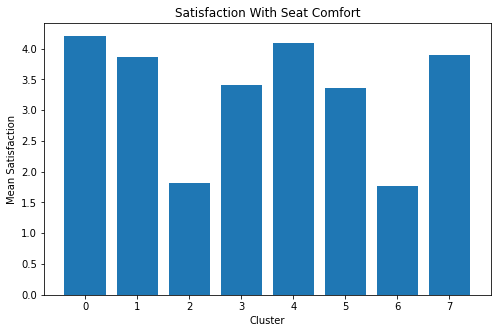

In [289]:
# Graph mean seat comfort
plt.figure(figsize = (8, 5));
plt.bar(clusters_by_mean['clusters'], 
        clusters_by_mean['Seat comfort']);
plt.xlabel('Cluster');
plt.ylabel('Mean Satisfaction');
plt.title('Satisfaction With Seat Comfort');

> Cluster 2 is overall dissatisfied with your airline and are not loyal customers. The above graph shows they score your airline very poorly on seat comfort. Investing in new seats, or providing extra pillows and cushions in-flight may raise the overall satisfaction of cluster 2. Cluster 2 primarily travels for business, and is not disgruntled. (They don't give your airline low marks across the board.) We feel this is a cluster that is worth courting.

#### Second Visualization

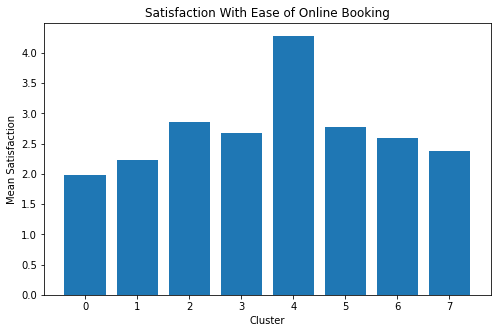

In [290]:
# Graph mean ease of online booking
plt.figure(figsize = (8, 5));
plt.bar(clusters_by_mean['clusters'], 
        clusters_by_mean['Ease of Online booking']);
plt.xlabel('Cluster');
plt.ylabel('Mean Satisfaction');
plt.title('Satisfaction With Ease of Online Booking');

> Cluster 0 ranks the lowest in online booking. Cluster 0 are loyal customers that overall are very satisfied with your airline. It would be worth updating your web services to make online booking easier. This would be a good investment, since only one cluster gives your airline high ratings on ease of online booking.

## Neural Networks

### Data processing

In [291]:
# The data has already been cleaned so we can go straight to setting the target
# and features.
X = ml_df.drop(columns = 'satisfied')
y = ml_df['satisfied']

### Principal component **analysis**

In [292]:
# Make a pca pipeline
pca_pipe = make_pipeline(StandardScaler(), PCA())
# Transform the data with our pipeline. This will be used only for the 
# purpose of getting the number of principal components
X_pca = pca_pipe.fit_transform(X)

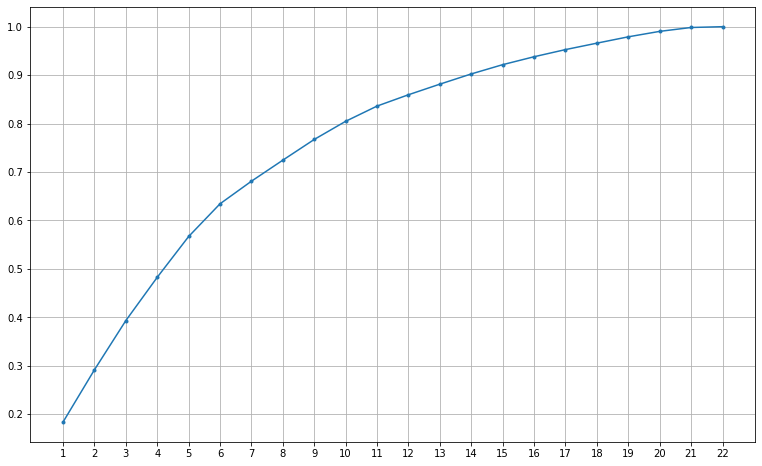

In [293]:
# Plot the cumulative variance for each component

# Get the number of features
num_feat = X_pca.shape[1]

# Plot the cumulative variance
plt.figure(figsize = (13, 8));
plt.plot(range(1, num_feat + 1), 
               pca.explained_variance_ratio_.cumsum(), 
         marker = '.');
plt.grid();
plt.xticks(range(1, num_feat + 1));

> We see from the above graph two principle components explains over 99.95% of the variance in the data.

In [294]:
# Look at the variance explained by the principal components more carefully.
pca.explained_variance_ratio_.cumsum()

array([0.18372425, 0.29162059, 0.39324734, 0.48260755, 0.56681812,
       0.63436298, 0.68101349, 0.72447697, 0.76721663, 0.80466994,
       0.83611219, 0.85948029, 0.88135164, 0.9024631 , 0.92158039,
       0.93794852, 0.95270883, 0.96599111, 0.97908164, 0.99033111,
       0.99833934, 1.        ])

> We will use 17 principal components as that will account for 95% of the variance in the data.

In [295]:
# Make a processing pipeline that using 17 principal components
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components = 0.95))

In [296]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [297]:
# Process the data
X_train_proc = pca_pipe.fit_transform(X_train)
X_test_proc = pca_pipe.transform(X_test)

In [298]:
# Find how many columns pca reduced the daty by
print('Number of columns in the original data set:', X_train.shape[1])
print('Number of columns after applying PCA:', X_train_proc.shape[1])

Number of columns in the original data set: 22
Number of columns after applying PCA: 17


> We see that using 17 principal components explains 95% of the variance in the data.
>
> Our data is now processed and is ready for modeling.

### Modeling

#### Model 1

In [299]:
# Instantiate a neural network
model1 = Sequential()
# Get the number of inpute nodes
input_dim = X_train_proc.shape[1]
input_dim

17

In [300]:
# Add hidden layers. The number of nodes in the first layer will be equal to the
# number of features
model1.add(Dense(input_dim, input_dim = input_dim, activation = 'relu'))
# This is a classification problem so we use sigmoid for the activation function
model1.add(Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 17)                306       
                                                                 
 dense_52 (Dense)            (None, 1)                 18        
                                                                 
Total params: 324
Trainable params: 324
Non-trainable params: 0
_________________________________________________________________


In [301]:
# Compile the model
model1.compile(loss = 'bce', 
               optimizer = 'adam',
               metrics = [metrics.Recall(),
                          metrics.Precision()])

In [302]:
# Train the model
history1 = model1.fit(X_train_proc, y_train,
                      validation_data = (X_test_proc, y_test),
                      epochs = 100,
                      verbose = 0)

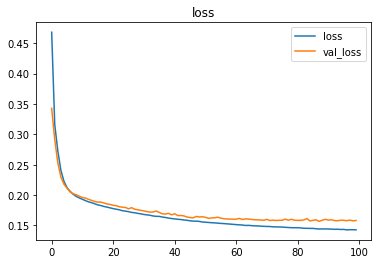

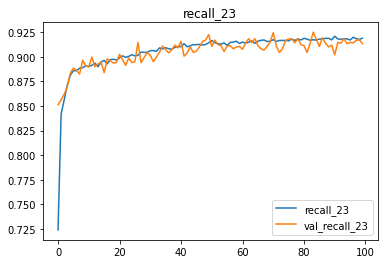

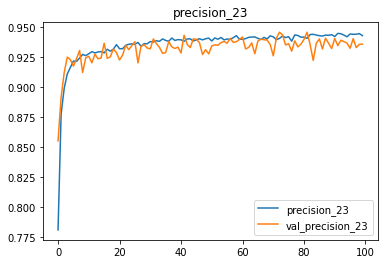

In [303]:
# Plot the history
plot_history(history1)

> The graph for the loss indicates our model is underfit. Our model has better precision than recall so it is giving a lower rate for false negatives. This means our model is more likely to incorrectly label a customer as 'unsatisfied'. This is okay from a business standpoint. Our stakeholder would prefer to label satisfied customers as 'unsatisfied' instead of labeling unsatisfied customers as 'satisfied'.
>
> Since our model is underfitting we will add an additional hidden layer to the next model.

#### Model 2

In [304]:
# Instantiate the second model
model2 = Sequential()

In [305]:
# Add the hidden layers
model2.add(Dense(input_dim, input_dim = input_dim, activation = 'relu'))
model2.add(Dense(input_dim, activation = 'relu'))
# Add the output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [306]:
# Compile the model
model2.compile(loss = 'bce', 
               optimizer = 'adam',
               metrics = [metrics.Precision(),
                          metrics.Recall()])

In [307]:
# Train the model
history2 = model2.fit(X_train_proc, y_train,
                      validation_data = (X_test_proc, y_test),
                      epochs = 100,
                      verbose = 0)

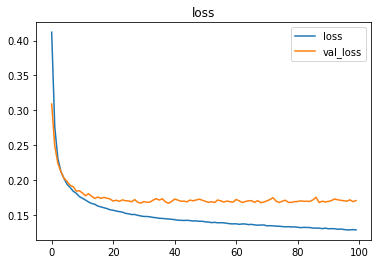

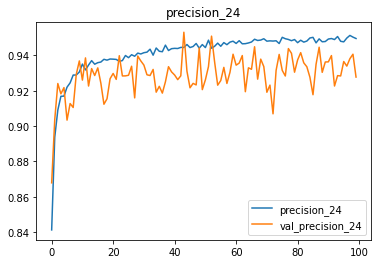

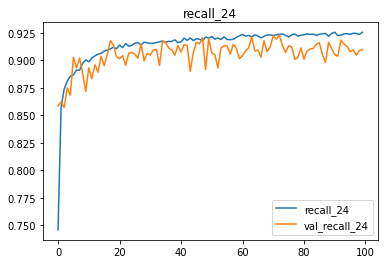

In [308]:
# Plot the history
plot_history(history2)

> We see from the loss graph that our model is now overfit. We will add some dropout to the next model to try and compensate for this. We see a lot of oscillations in our precision and recall.

#### Model 3

In [309]:
# Instantiate the third model
model3 = Sequential()

In [310]:
# Add hidden layers and dropout
model3.add(Dense(input_dim, input_dim = input_dim, activation = 'relu'))
model3.add(Dropout(0.3))
model3.add(Dense(input_dim, activation = 'relu'))
model3.add(Dropout(0.3))
# Add the output layer
model3.add(Dense(1, activation = 'sigmoid'))

In [311]:
# Compile the model
model3.compile(loss = 'bce', 
               optimizer = 'adam',
               metrics = [metrics.Precision(),
                          metrics.Recall()])

In [312]:
# Train the model with early stopping
history3 = model3.fit(X_train_proc, y_train,
                      validation_data = (X_test_proc, y_test),
                      epochs = 100,
                      verbose = 0)

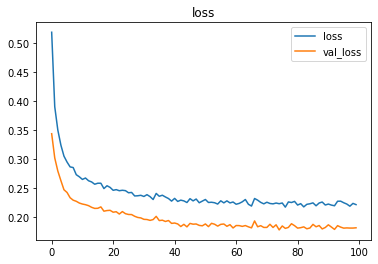

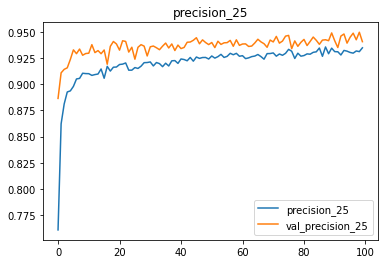

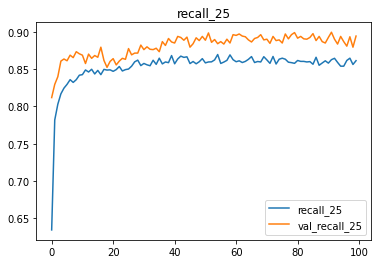

In [313]:
# Plot the history
plot_history(history3)

> The dropout has caused our test scores to be better than our training scores. We see only a marginal improvement in the loss, however there are fewer oscillations in our test precision and recall so we will choose this model as our final model.

#### Final model

In [314]:
# We choose the third model as our final model. We are building it from scratch
# so we can add early stopping
final_model = Sequential()

In [315]:
# Add hidden layers and dropout
final_model.add(Dense(input_dim, input_dim = input_dim, activation = 'relu'))
final_model.add(Dropout(0.3))
final_model.add(Dense(input_dim, activation = 'relu'))
final_model.add(Dropout(0.3))
# Add the output layer
final_model.add(Dense(1, activation = 'sigmoid'))

In [316]:
# Compile the model
final_model.compile(loss = 'bce',
                    optimizer = 'adam',
                    metrics = [metrics.Recall(),
                               metrics.Precision()])

In [317]:
# Train the final model using early stopping
earlystopper = EarlyStopping(patience = 5)
history = final_model.fit(X_train_proc, y_train,
                          validation_data = (X_test_proc, y_test),
                          epochs = 50,
                          verbose = 0,
                          callbacks = [earlystopper])

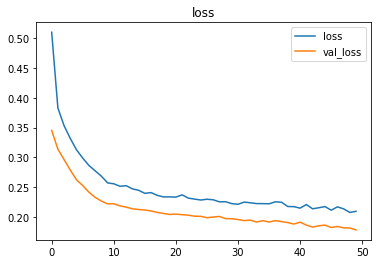

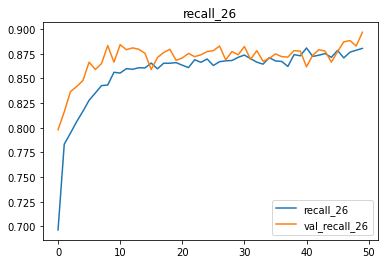

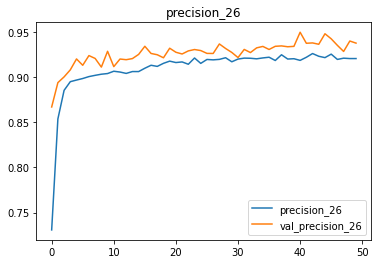

In [318]:
# Plot the history
plot_history(history)

In [327]:
# Evaluate the model
train_preds = final_model.predict(X_train_proc)
test_preds = final_model.predict(X_test_proc)
print('-'*18 + ' Traning Metrics ' + '-'*18)
print(classification_report(y_train, np.round(train_preds)))
print('\n' + '-'*19 + ' Test Metrics ' + '-'*20)
print(classification_report(y_test, np.round(test_preds)))

------------------ Traning Metrics ------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8482
           1       0.95      0.90      0.92      6518

    accuracy                           0.93     15000
   macro avg       0.93      0.93      0.93     15000
weighted avg       0.93      0.93      0.93     15000


------------------- Test Metrics --------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2857
           1       0.94      0.90      0.92      2143

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



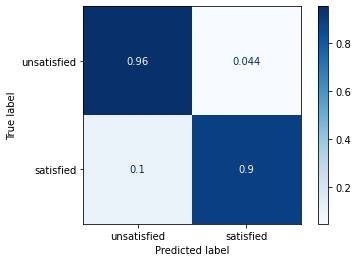

In [337]:
# Make a confusion matrix for the test data
labels = ['unsatisfied', 'satisfied']
ConfusionMatrixDisplay.from_predictions(y_test, np.round(test_preds),
                                        display_labels = labels,
                                        normalize = 'true',
                                        cmap = 'Blues')

> Our final model does reasonably well. The similarity in our metrics indicates we are not overfitting. The confusion matrix shows us we are more likely to predict a false negative than a false positive. This is okay for our stakeholder as it is better to incorrectly label a satisfied customer than to incorrectly label an unsatisfied customer.
>
> In the event that our precision was lower, we could increase the threshold to reduce the number of false positives. 